In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import smogn
import os

In [2]:
path_to_data = os.path.join(os.path.expanduser('~'), "Documents/CatTheory/CO2RR_selectivity_ML/Data/Datasets/BSc")

df = pd.read_csv(path_to_data + '/data', index_col=False)

data = df[['Vnhe', 'H*', 'CO*', 'OCCOH*', 'OH*', 'O*', 'C*', 'H2']]

target = data[data.columns[-1]].name

In [3]:
df.iloc[:,4:]

,Vnhe,H*,CO*,OCCOH*,OH*,O*,C*,CH4,C2H4,EtOH,PrOH,CO,HCOOH,H2
0,-1.44,0.023236,-0.556853,0.070148,0.856654,0.936462,1.807598,33.3,25.5,5.7,3.00,1.3,9.4,20.5
1,-1.37,0.433729,-0.087450,1.025489,1.280763,2.010691,3.185689,0.0,0.0,0.0,0.00,81.5,0.8,12.4
2,-1.14,0.407140,-0.090951,0.605229,1.977928,2.656480,2.423984,0.0,0.0,0.0,0.00,87.1,0.7,10.2
3,-1.07,-0.225918,-1.430356,-1.688655,0.774783,1.584325,-0.444057,0.0,0.0,0.0,0.00,0.0,0.1,95.7
4,-1.48,0.826178,-0.165051,0.381047,0.352010,0.551014,1.354276,0.0,0.0,0.0,0.00,7.1,88.4,4.6
5,-1.55,0.848249,-0.141406,0.659065,0.171168,0.363054,1.846257,0.0,0.0,0.0,0.00,2.1,94.9,3.3
6,-1.63,0.907909,-0.123199,0.973498,0.386810,1.028115,2.258035,0.0,0.0,0.0,0.00,0.0,97.4,5.0
7,-1.63,0.731254,-0.124407,0.805581,0.949977,0.612106,1.898795,1.3,0.0,0.0,0.00,13.9,78.4,9.4
8,-0.91,-0.459489,-1.669840,-1.884714,-0.229531,-0.862073,-0.629994,0.0,0.0,0.0,0.00,0.0,0.0,94.8
9,-1.54,0.533896,-0.148887,0.250439,0.702620,-0.153392,1.033256,0.0,0.0,0.0,0.00,79.4,6.1,9.9


In [4]:
## conduct smogn
sub_df = smogn.smoter(
    data = data, 
    y = target,
    k = 6,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.3,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.5
                          ## positive real number (0 < R)
)

r_index: 100%|##########| 2/2 [00:00<00:00, 386.91it/s]


In [5]:
sub_df

,Vnhe,H*,CO*,OCCOH*,OH*,O*,C*,H2
0,-1.371913,0.434489,-0.090915,0.970277,1.292899,2.017131,3.189112,12.338840
1,-1.356464,0.055208,-0.735608,0.000000,0.000000,0.433865,0.699848,12.603543
2,-1.422783,0.141494,-0.628479,0.495357,0.356959,0.584724,0.827006,12.529285
3,-1.370296,0.020719,-0.777366,0.000000,0.000000,0.687508,0.825302,12.165338
4,-1.343941,0.032590,-0.717635,0.000000,0.000000,0.512932,0.755555,15.310434
5,-1.548885,0.025303,-0.560940,0.072510,0.070755,0.881669,1.694546,16.809298
6,-1.507863,0.029888,-0.590299,0.000000,0.029088,0.811290,1.525973,17.152907
7,-1.438508,0.018912,-0.545522,0.071975,0.864272,0.946658,1.795880,19.628164
8,-0.910903,0.000000,-1.671973,0.000000,0.000000,0.000000,0.000000,94.039290
9,-1.068505,0.000000,-1.457970,0.000000,0.789129,1.569485,0.000000,95.345043


In [6]:
sub_df.shape

(33, 8)

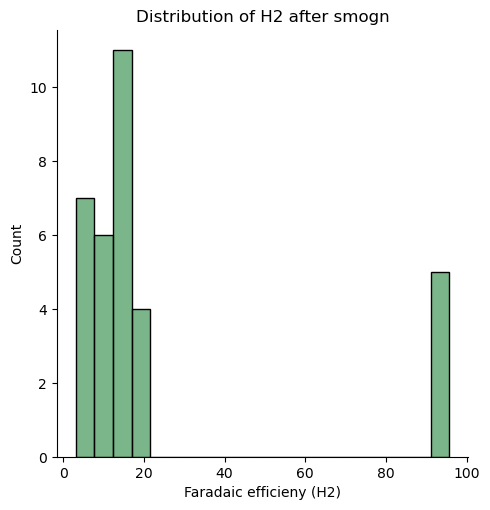

In [7]:
import seaborn as sns

sns.displot(x=sub_df[target], bins=20, color='#4f9e63')
plt.xlabel(f'Faradaic efficieny ({target})')
plt.title(f'Distribution of {target} after smogn')
# path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")
#plt.savefig(path_to_figs + f'dist_{target}_w_smogn.pdf', bbox_inches='tight')
plt.show()

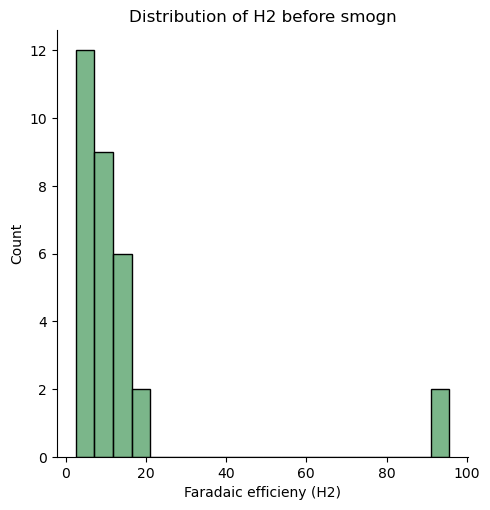

In [8]:
sns.displot(x=data[target], bins=20, color='#4f9e63')
plt.xlabel(f'Faradaic efficieny ({target})')
plt.title(f'Distribution of {target} before smogn')
#path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")
# plt.savefig(path_to_figs + f'dist_{target}_wo_smogn.pdf', bbox_inches='tight')
plt.show()

In [9]:
sub_df.to_csv(path_to_data + f"/smogn/smogn_{target}")